## Aula 16 - Detecção de Contornos e Aproximação Poligonal

### 16.1 Detecção de Contornos

Começamos importando as bibliotecas necessárias:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy

In [51]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/forma1.jpg
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/forma2.jpg
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/mundo.jpg
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/dados.jpg
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/hand.jpg
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/minions.jpg

--2021-06-30 19:22:26--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/forma1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4080 (4.0K) [image/jpeg]
Saving to: ‘forma1.jpg.1’

forma1.jpg.1        100%[===================>]   3.98K  --.-KB/s    in 0s      

2021-06-30 19:22:26 (49.5 MB/s) - ‘forma1.jpg.1’ saved [4080/4080]

--2021-06-30 19:22:26--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/forma2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3303 (3.2K) [image/jpeg]
Saving to: ‘

Existem várias aplicações para a detecção de contornos. Neste primeiro exemplo, vamos usar esta técnica para contar objetos em uma imagem.

Iniciamos carregando a imagem de testes:

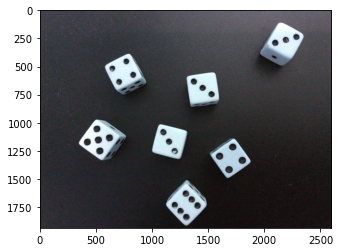

In [29]:
img = cv2.imread('dados.jpg')
plt.imshow(img)

O segundo passo é binarizar a imagem. Esse passo não é obrigatório, mas melhora muito a qualidade da técnica. Antes, vamos suavizar a imagem para nos livrar de ruído:

In [30]:
cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
borrado = cv2.GaussianBlur(cinza, (5, 5), 0)
binario = cv2.threshold(borrado, 200, 255, cv2.THRESH_BINARY)

Essa é a nossa nova imagem:

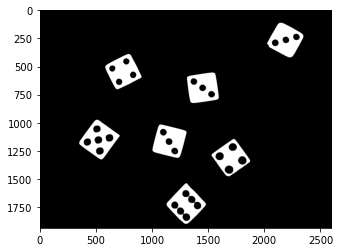

In [31]:
plt.imshow(binario[1], cmap="gray")

Com a imagem binarizada podemos usar o método [cv2.findCountours()](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a) para encontrar os contornos da imagem. O método possui três parametros:

1. A imagem de entrada - 8 bits
2. O tipo de hierarquia - O tipo de árvore hierárquica retornada pela função:
  * **RETR_TREE** - Útil para procurar pequenas regiões dentro de regiões maiores
  * RETR_EXTERNAL - Contornos mais externos
3. Algoritmo de detecção de contorno:
  * **CHAIN_APPROX_SIMPLE** - Apenas pontos finais
  * **CHAIN_APPROX_NONE** - Todos os pontos


Encontrados 7 objetos!
	Tamanho do contorno 0: 423
	Tamanho do contorno 1: 476
	Tamanho do contorno 2: 497
	Tamanho do contorno 3: 456
	Tamanho do contorno 4: 327
	Tamanho do contorno 5: 620
	Tamanho do contorno 6: 570


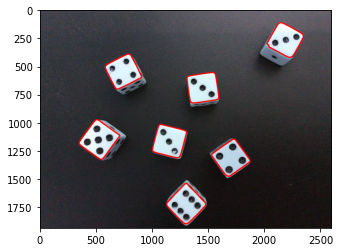

In [42]:
mode = cv2.RETR_EXTERNAL #@param ['cv2.RETR_TREE', 'cv2.RETR_EXTERNAL']
method = cv2.CHAIN_APPROX_SIMPLE #@param ['cv2.CHAIN_APPROX_SIMPLE', 'cv2.CHAIN_APPROX_NONE']

contornos, _ = cv2.findContours(binario[1], mode, method)

print("Encontrados %d objetos!" % len(contornos))
for (i, c) in enumerate(contornos):
    print("\tTamanho do contorno %d: %d" % (i, len(c)))


img_contornos = img.copy()

img_contornos = cv2.drawContours(img_contornos, contornos, -1, (255, 0, 0), 10)
plt.imshow(img_contornos)

A partir daí, já podemos contar quantos dados temos na imagem:

### 16.2 Convex Hull

Para o Convex Hull, siga o passo-a-passo descrito na aula:
0. Carregar a imagem;
1. Tons de cinza;
2. Borramento;
3. Binarização;
4. Encontrar os contornos;
5. Encontrar e desenhar o fechamento convexo.

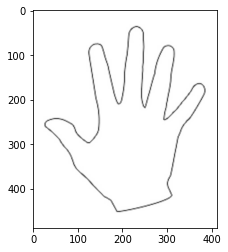

In [99]:
img = cv2.imread('hand.jpg', 1)
plt.imshow(img)

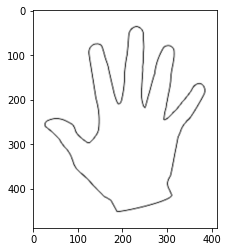

In [100]:
img_cinza = None
plt.imshow(img_cinza, cmap="gray")

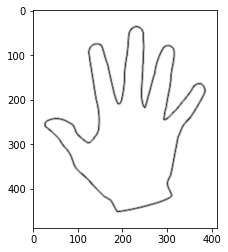

In [101]:
borrada = None
plt.imshow(borrada, cmap="gray")

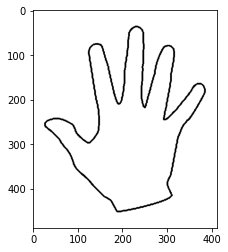

In [107]:
ret, binarizada = None
plt.imshow(binarizada, cmap="gray")

No quarto passo, utilize o método de encontrar os contornos como foi mostrado anteriormente.

In [103]:
contornos, hierarquia = None

No último passo usaremos o método [cv2.convexHull](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga014b28e56cb8854c0de4a211cb2be656) para cada um dos contornos encontrados.

In [104]:
hull = []
for i in range(len(contornos)):
    hull.append(cv2.convexHull(contornos[i], False))

resultado = np.zeros((binarizada.shape[0], binarizada.shape[1], 3), np.uint8)

In [105]:
for i in range(len(contornos)):
    cv2.drawContours(resultado, contornos, i, (0, 255, 0), 2, 8, hierarquia)
    cv2.drawContours(resultado, hull, i, (255, 255, 255), 2, 8)

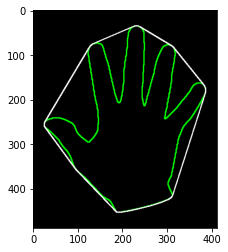

In [106]:
plt.imshow(resultado)

### 16.3 Casamento de Formas

Usamos o mesmo pipeline das técnicas anteriores, encontrando primeiro os contornos e depois comparando-os usando o método [cv2.matchShapes](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#gaadc90cb16e2362c9bd6e7363e6e4c317). A saída é a proximidade das formas.

Text(0.5, 1.0, 'Forma 2')

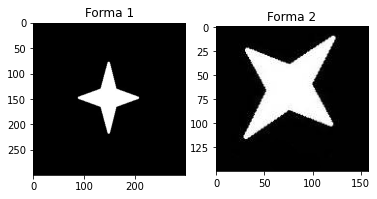

In [83]:
img1 = cv2.imread('forma1.jpg',0)
img2 = cv2.imread('forma2.jpg',0)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img1, 'gray')
ax1.set_title('Forma 1')
ax2.imshow(img2, 'gray')
ax2.set_title('Forma 2')

In [84]:
# Imagem 1 com ela mesma:

ret, bina = cv2.threshold(img1, 127, 255,0)
ret, bina2 = cv2.threshold(img1, 127, 255,0)
contornos,hierarquia = cv2.findContours(bina,2,1)
cnt1 = contornos[0]
contornos,hierarquia = cv2.findContours(bina2,2,1)
cnt2 = contornos[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print("Imagem 1 com ela mesma: ", ret)

# Imagem 1 com a 2:

ret, bina = cv2.threshold(img1, 127, 255,0)
ret, bina2 = cv2.threshold(img2, 127, 255,0)
contornos,hierarquia = cv2.findContours(bina,2,1)
cnt1 = contornos[0]
contornos,hierarquia = cv2.findContours(bina2,2,1)
cnt2 = contornos[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print("Imagem 1 com a 2: ", ret)

# Imagem 2 com ela mesma:

ret, bina = cv2.threshold(img2, 127, 255,0)
ret, bina2 = cv2.threshold(img2, 127, 255,0)
contornos,hierarquia = cv2.findContours(bina,2,1)
cnt1 = contornos[0]
contornos,hierarquia = cv2.findContours(bina2,2,1)
cnt2 = contornos[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print("Imagem 2 com ela mesma: ", ret)

Imagem 1 com ela mesma:  0.0
Imagem 1 com a 2:  0.0006329309801681449
Imagem 2 com ela mesma:  0.0
